C:\Users\seina\AppData\Local\Temp\ipykernel_23204\1653758191.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_box = driver.find_element_by_name('q')
C:\Users\seina\AppData\Local\Temp\ipykernel_23204\1653758191.py:28: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  search_button = driver.find_element_by_class_name('Tg7LZd')
C:\Users\seina\AppData\Local\Temp\ipykernel_23204\1653758191.py:34: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  show_more_button = driver.find_elements_by_class_name('YstHxe')
C:\Users\seina\AppData\Local\Temp\ipykernel_23204\1653758191.py:38: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  images = driver.find_elements_by_css_selector('img.rg_i')


['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUJqQ0G7Sh6c0kxhfblIeR5AvWepdrcaJ_xg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSe4NZ2wPfMFLrtsbw_rIX4AkgzOdSfNCs7A&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSURALg9jFquF7Hshk2VnjkdzWhoCFaarPSGg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRirKSJgIaGGck5hHoctJGCizZOp_W4RVJdog&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7qcbgIoll1sGqYza6RnpLV_2I1sISwmK9TQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbqMEDxOyTSjkeHjVrme_873hCfJZbKLRxtQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNpymVqDlxLTpNOV4Z2XU40O_99mL_Tg5FXg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGEOp4e1KAeTUF0kEJ9LHWJAdxXQ3ib9lM6w&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5pWVZuSIWS6NofNnx84lrhJJ0OaVOzENtVQ&usq
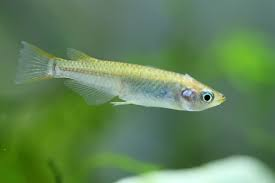
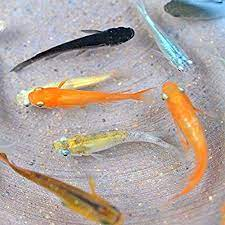
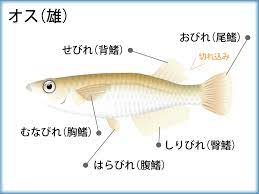
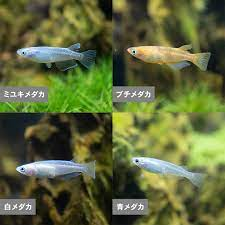
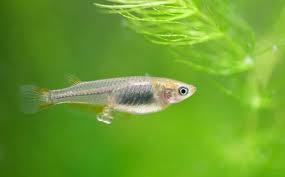
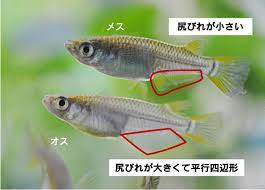
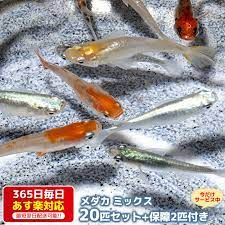
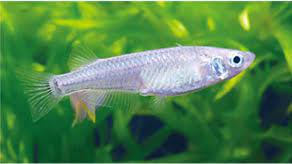
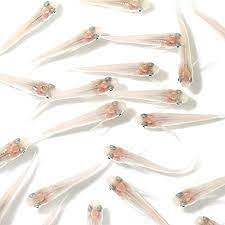
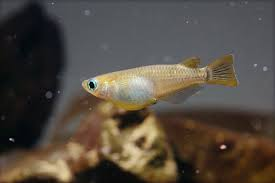
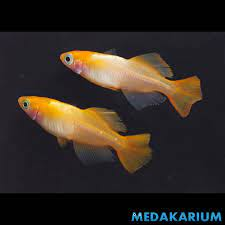
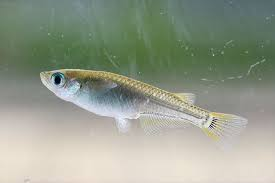
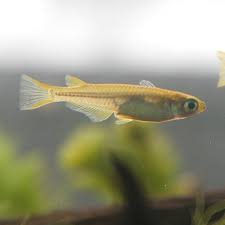
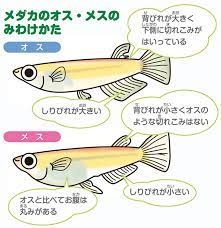
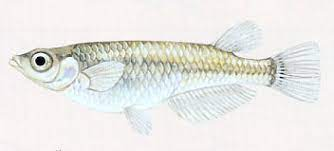
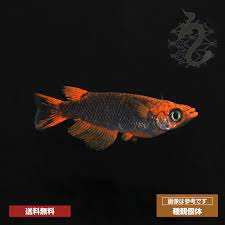
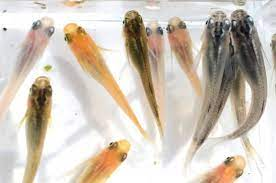
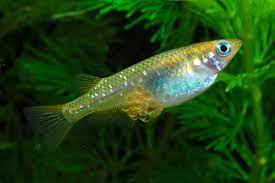
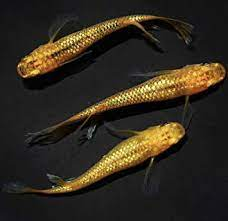
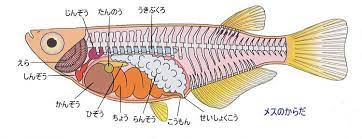

In [23]:
from selenium import webdriver
import os 
import requests
import time
import base64
import urllib.request


image_urls = []

if __name__ == '__main__':
  # Chromeを起動する
  driver = webdriver.Chrome()

  # Google画像検索にアクセスする
  driver.get('https://www.google.co.jp/imghp')

  # 検索ボックスに「メダカ」と入力する
  search_box = driver.find_element_by_name('q')
  search_box.send_keys('メダカ')

  # 検索ボタンをクリックする
  search_button = driver.find_element_by_class_name('Tg7LZd')
  search_button.click()
    
  for i in range(50):
    time.sleep(1)
    driver.execute_script("window.scrollBy(0, 1000)")
    show_more_button = driver.find_elements_by_class_name('YstHxe')
    if (show_more_button[0].get_attribute('style') != "display: none;"):
        show_more_button[0].click()
        
  images = driver.find_elements_by_css_selector('img.rg_i')
  urls = [image.get_attribute('src') for image in images]
    
  cwd = os.getcwd()
    
  if not os.path.exists(f"{cwd}/images"):
    os.makedirs(f"{cwd}/images")
  
  for i, url in enumerate(urls[:500]):
    image_urls.append(url)
    # URLのスキーマを確認する
    if url.startswith("http"):
        urllib.request.urlretrieve(url, f"{cwd}/images/image{i}.jpg")
    if url.startswith("data:image"):
        with open(f"{cwd}/images/image{i}.jpg", "wb") as f:
            f.write(base64.b64decode(url.split(",")[1]))
    
    
    
  
  # Chromeを終了する
  driver.quit()
  
  print(f'{len(image_urls)}枚画像を枚ダウンロードしました。')